In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

In [3]:
import sys
if 'sklearn' in sys.modules:
    del sys.modules['sklearn']

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from scipy.io import arff

In [7]:
data, meta = arff.loadarff('compound.arff')

In [9]:
df = pd.DataFrame(data)

In [27]:
df['x'] = df['x'].astype(float)
df['y'] = df['y'].astype(float)

In [29]:
print(df.head())

       x      y class
0  26.75  22.15  b'1'
1  29.80  22.15  b'1'
2  31.55  21.10  b'1'
3  27.70  20.85  b'1'
4  29.90  19.95  b'1'


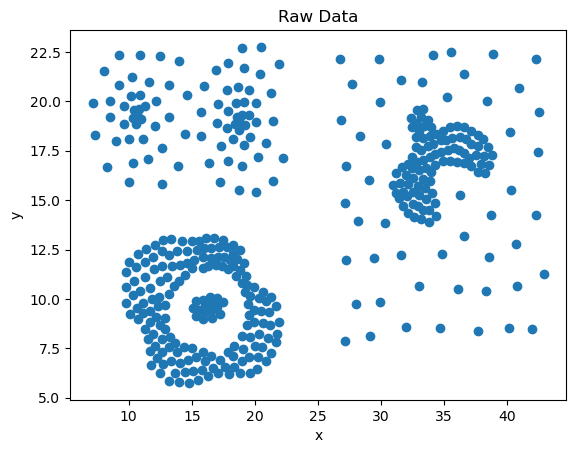

In [31]:
plt.scatter(df['x'], df['y'])
plt.title('Raw Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [33]:
X_aniso = df[['x', 'y']].values

In [35]:
kmeans = KMeans(n_clusters=6, random_state=170, n_init=10)
kmeans_labels = kmeans.fit_predict(X_aniso)

In [47]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_aniso)


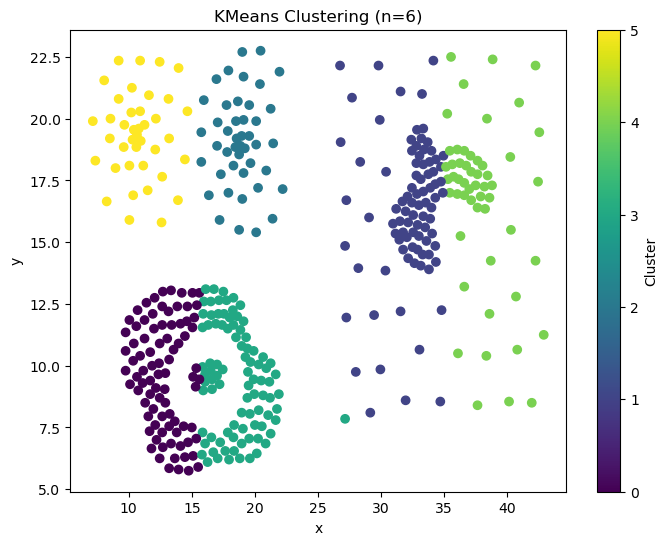

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering (n=6)')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Cluster')
plt.show()

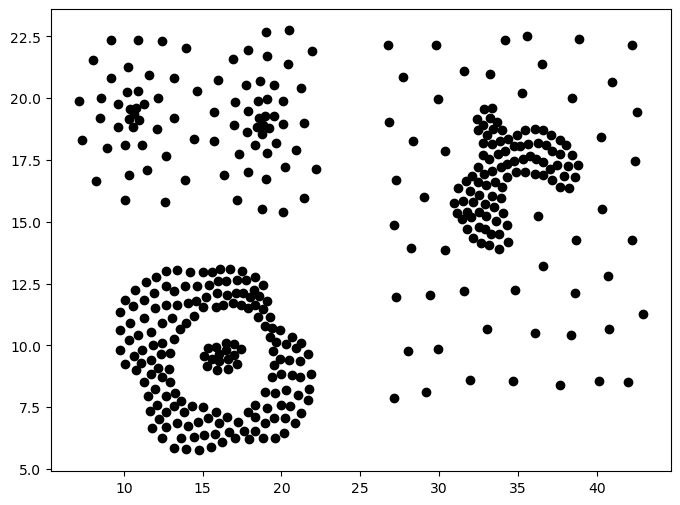

In [59]:
plt.figure(figsize=(8, 6))
unique_labels = np.unique(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for label, col in zip(unique_labels, colors):
    if label == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (dbscan_labels == label)
    xy = X_aniso[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6, label=f'Cluster {label}')

In [69]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(X_aniso)

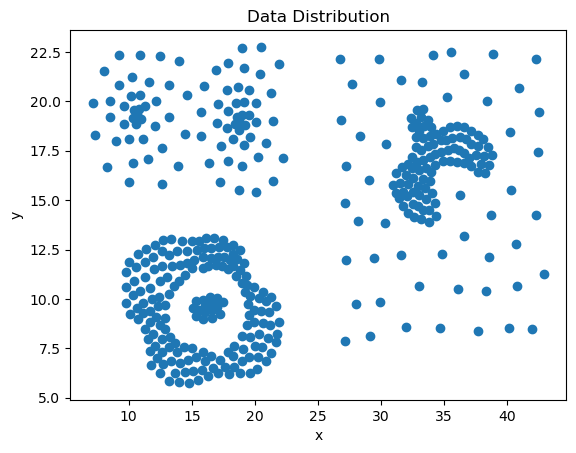

In [71]:
plt.scatter(X_aniso[:, 0], X_aniso[:, 1])
plt.title('Data Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [73]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_aniso_normalized = scaler.fit_transform(X_aniso)
